In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\PC\Documents\CSV_DATASETS\animal_disease_dataset.csv")

In [3]:
df.head(10)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia
5,goat,10,101.2,loss of appetite,blisters on gums,difficulty walking,foot and mouth
6,sheep,6,103.3,loss of appetite,depression,painless lumps,lumpy virus
7,goat,6,101.7,difficulty walking,blisters on tongue,loss of appetite,foot and mouth
8,buffalo,9,102.5,depression,painless lumps,loss of appetite,lumpy virus
9,goat,3,102.7,lameness,blisters on mouth,loss of appetite,foot and mouth


In [4]:
df.shape

(43778, 7)

In [5]:
cow_count = df['Animal'].value_counts()['cow']
print(f"Total number of cows: {cow_count}")
buffalo_count = df['Animal'].value_counts()['buffalo']
print(f"Total number of buffalo: {buffalo_count}")
sheep_count = df['Animal'].value_counts()['sheep']
print(f"Total number of sheep: {sheep_count}")
goat_count = df['Animal'].value_counts()['goat']
print(f"Total number of goat: {goat_count}")


Total number of cows: 11254
Total number of buffalo: 11238
Total number of sheep: 10658
Total number of goat: 10628


In [6]:
# We focus on cows

In [7]:
cows_df = df[df['Animal'] == 'cow'].copy()

# Display information about the new DataFrame
print("Cows Dataset Information:")
print(f"Total number of cow entries: {len(cows_df)}")
print("\nFirst few rows of cows dataset:")
print(cows_df.head())

# Verify we only have cows
print("\nUnique animals in new DataFrame:")
print(cows_df['Animal'].unique())

Cows Dataset Information:
Total number of cow entries: 11254

First few rows of cows dataset:
   Animal  Age  Temperature            Symptom 1         Symptom 2  \
0     cow    3        103.1           depression    painless lumps   
3     cow   14        100.3     loss of appetite  swelling in limb   
11    cow   11        103.9           depression    painless lumps   
19    cow   14        102.7  shortness of breath            sweats   
20    cow    1        103.7           depression  loss of appetite   

           Symptom 3      Disease  
0   loss of appetite    pneumonia  
3    crackling sound     blackleg  
11  loss of appetite  lumpy virus  
19            chills      anthrax  
20    painless lumps  lumpy virus  

Unique animals in new DataFrame:
['cow']


In [8]:
cows_df.head(10)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
11,cow,11,103.9,depression,painless lumps,loss of appetite,lumpy virus
19,cow,14,102.7,shortness of breath,sweats,chills,anthrax
20,cow,1,103.7,depression,loss of appetite,painless lumps,lumpy virus
22,cow,14,100.8,painless lumps,loss of appetite,depression,lumpy virus
24,cow,7,101.9,chest discomfort,swelling in extremities,shortness of breath,anthrax
26,cow,12,100.3,loss of appetite,depression,painless lumps,lumpy virus
30,cow,2,102.7,loss of appetite,sores on hooves,lameness,foot and mouth
38,cow,2,100.3,swelling in limb,crackling sound,difficulty walking,blackleg


In [9]:
#Temperature Profiling by Disease

In [10]:
print("Available columns in the dataset:")
print(cows_df.columns.tolist())

Available columns in the dataset:
['Animal', 'Age', 'Temperature', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Disease']


In [11]:
# Calculate descriptive statistics for temperature by disease
temp_stats_by_disease = cows_df.groupby('Disease')['Temperature'].describe()

# Display comprehensive statistics
print("Temperature Statistics by Disease:")
print(temp_stats_by_disease.round(2))

# Calculate additional useful metrics
disease_temp_analysis = cows_df.groupby('Disease')['Temperature'].agg([
    ('Mean Temperature', 'mean'),
    ('Median Temperature', 'median'),
    ('Min Temperature', 'min'),
    ('Max Temperature', 'max'),
    ('Temperature Range', lambda x: x.max() - x.min()),
    ('Standard Deviation', 'std')
]).round(2)

print("\nDetailed Temperature Analysis by Disease:")
print(disease_temp_analysis)

Temperature Statistics by Disease:
                 count    mean   std    min    25%    50%    75%    max
Disease                                                                
anthrax         2458.0  102.24  1.39  100.0  101.1  102.1  103.3  105.0
blackleg        2494.0  102.27  1.39  100.0  101.1  102.2  103.4  105.0
foot and mouth  2433.0  102.22  1.39  100.0  101.0  102.1  103.3  105.0
lumpy virus     1914.0  102.30  1.42  100.0  101.1  102.2  103.5  105.0
pneumonia       1955.0  102.35  1.42  100.0  101.1  102.3  103.5  105.0

Detailed Temperature Analysis by Disease:
                Mean Temperature  Median Temperature  Min Temperature  \
Disease                                                                 
anthrax                   102.24               102.1            100.0   
blackleg                  102.27               102.2            100.0   
foot and mouth            102.22               102.1            100.0   
lumpy virus               102.30               102.2 

Temperature Statistics by Disease (Celsius):
                 count   mean   std    min    25%    50%    75%    max
Disease                                                               
anthrax         2458.0  39.02  0.77  37.78  38.39  38.94  39.61  40.56
blackleg        2494.0  39.04  0.77  37.78  38.39  39.00  39.67  40.56
foot and mouth  2433.0  39.01  0.77  37.78  38.33  38.94  39.61  40.56
lumpy virus     1914.0  39.05  0.79  37.78  38.39  39.00  39.72  40.56
pneumonia       1955.0  39.08  0.79  37.78  38.39  39.06  39.72  40.56


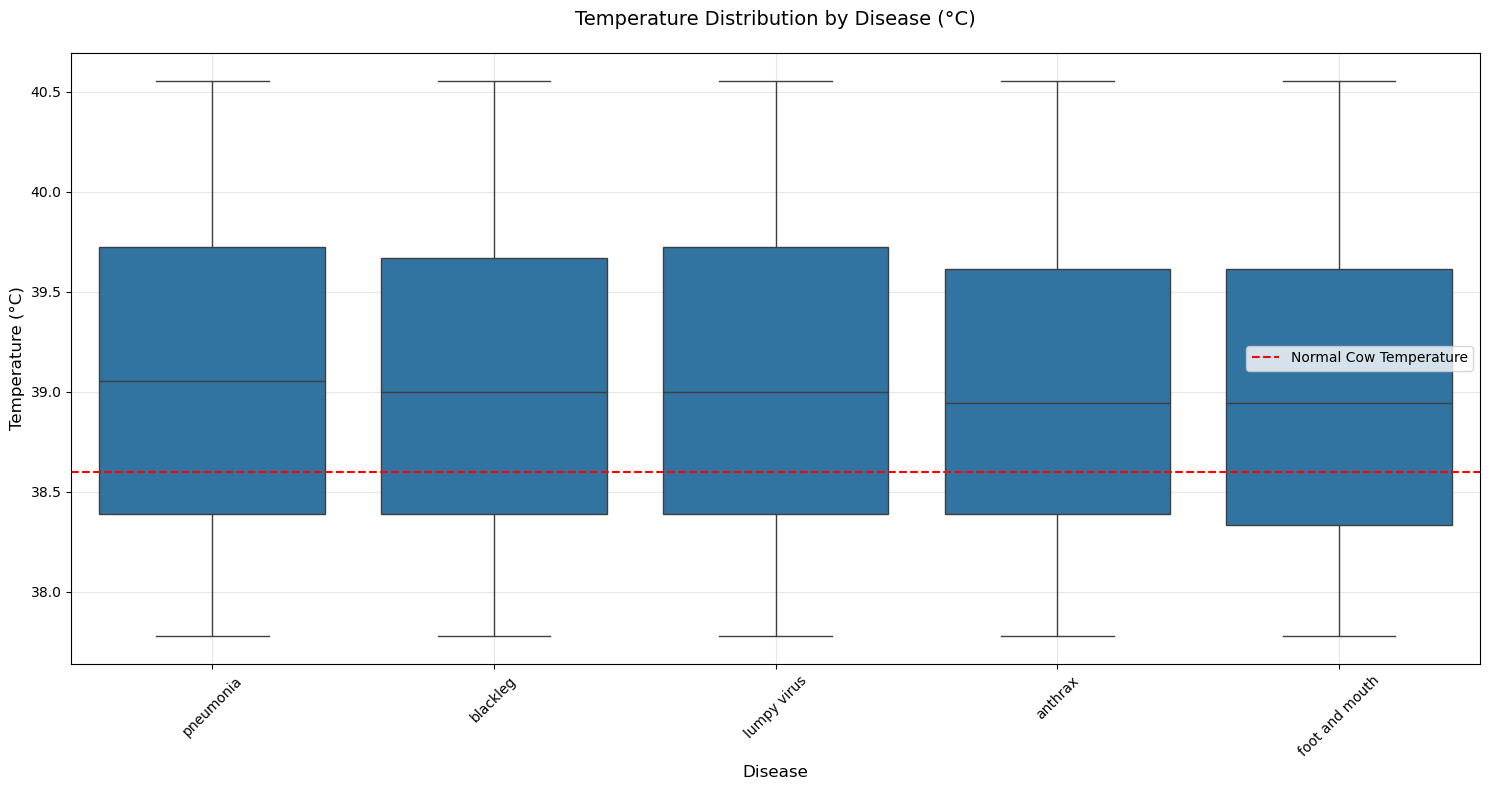

In [13]:
# Convert temperature to Celsius
cows_df['Temperature_Celsius'] = (cows_df['Temperature'] - 32) * 5/9

# Calculate descriptive statistics for Celsius temperatures by disease
temp_celsius_stats = cows_df.groupby('Disease')['Temperature_Celsius'].describe()
print("Temperature Statistics by Disease (Celsius):")
print(temp_celsius_stats.round(2))

# Create boxplot with Celsius temperatures
plt.figure(figsize=(15, 8))
sns.boxplot(x='Disease', y='Temperature_Celsius', data=cows_df)
plt.title('Temperature Distribution by Disease (°C)', fontsize=14, pad=20)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add reference line for normal cow temperature (38.6°C)
plt.axhline(y=38.6, color='r', linestyle='--', label='Normal Cow Temperature')
plt.legend()
plt.tight_layout()
plt.show()

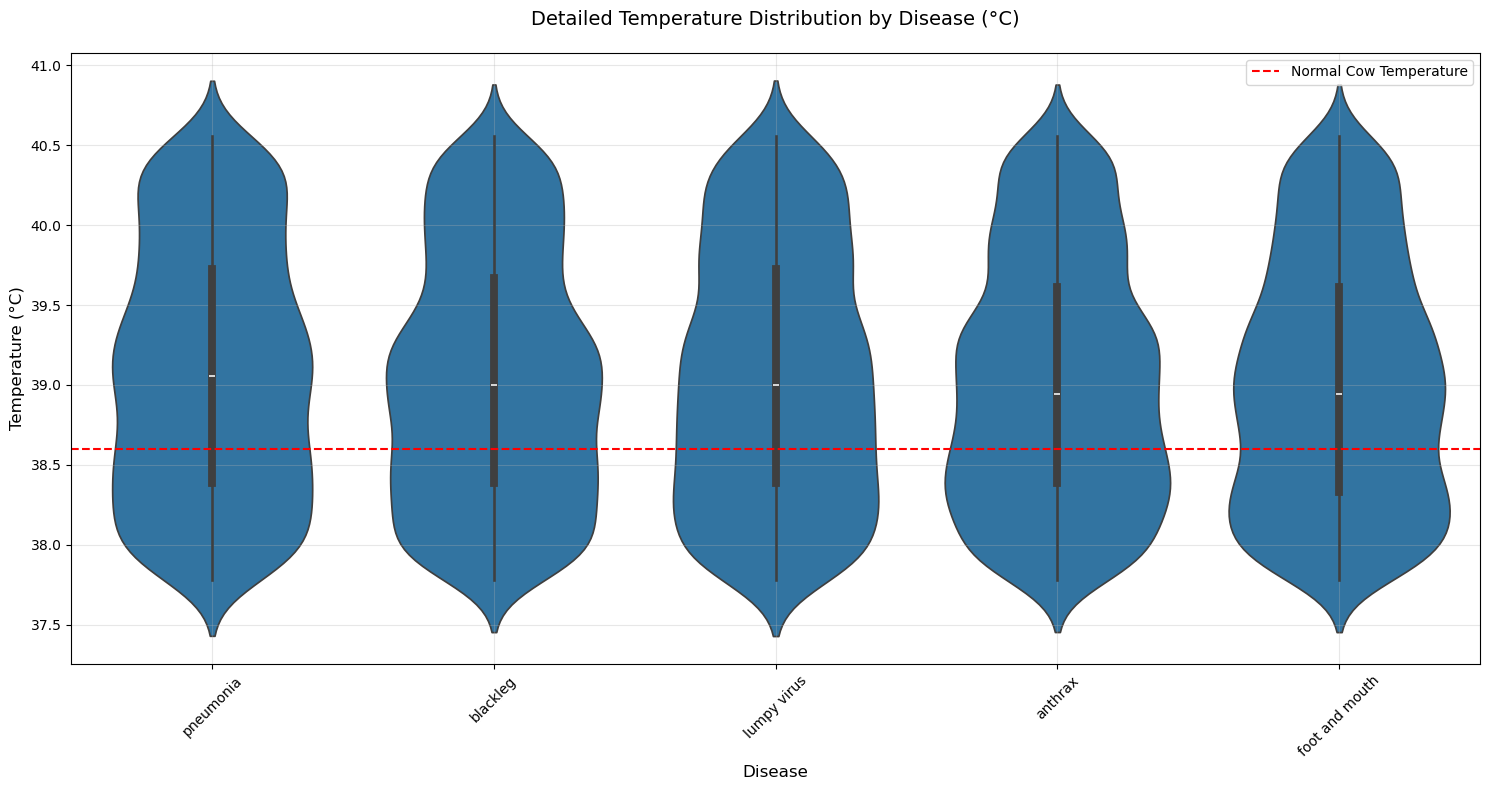

In [14]:
# Create violin plot for Celsius temperature distributions
plt.figure(figsize=(15, 8))
sns.violinplot(x='Disease', y='Temperature_Celsius', data=cows_df)

# Enhance the visualization
plt.title('Detailed Temperature Distribution by Disease (°C)', fontsize=14, pad=20)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add reference line for normal cow temperature
plt.axhline(y=38.6, color='r', linestyle='--', label='Normal Cow Temperature')
plt.legend()

plt.tight_layout()
plt.show()

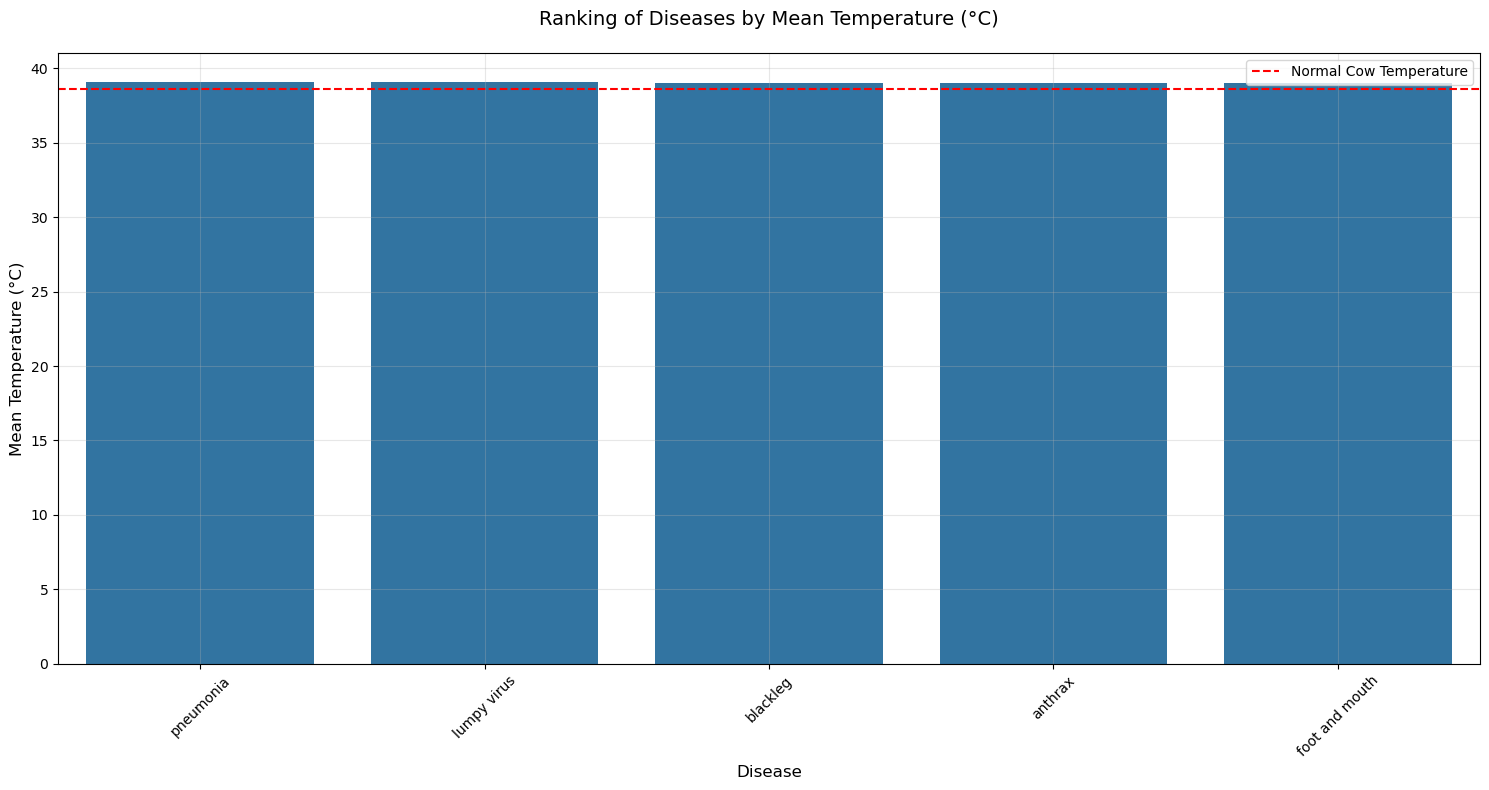

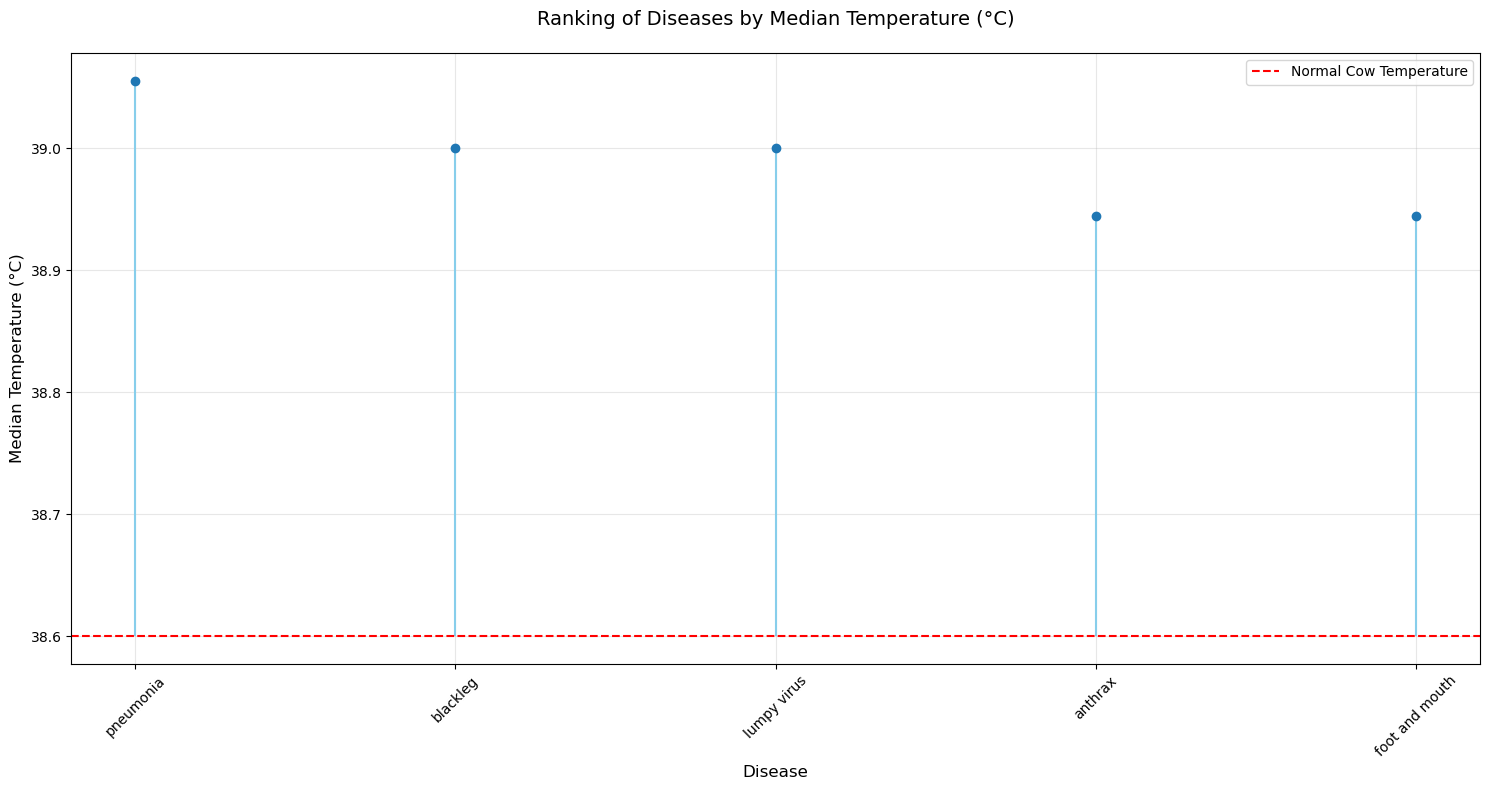

In [15]:
# Create bar plot for mean temperatures
plt.figure(figsize=(15, 8))
disease_means = cows_df.groupby('Disease')['Temperature_Celsius'].mean().sort_values(ascending=False)
sns.barplot(x=disease_means.index, y=disease_means.values)
plt.title('Ranking of Diseases by Mean Temperature (°C)', fontsize=14, pad=20)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=38.6, color='r', linestyle='--', label='Normal Cow Temperature')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create lollipop plot for median temperatures
plt.figure(figsize=(15, 8))
disease_medians = cows_df.groupby('Disease')['Temperature_Celsius'].median().sort_values(ascending=False)
plt.vlines(x=disease_medians.index, ymin=38.6, ymax=disease_medians.values, color='skyblue')
plt.plot(disease_medians.index, disease_medians.values, "o")
plt.title('Ranking of Diseases by Median Temperature (°C)', fontsize=14, pad=20)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Median Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.axhline(y=38.6, color='r', linestyle='--', label='Normal Cow Temperature')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Temperature-Age Correlations by Disease:

pneumonia:
Pearson correlation: -0.021
Spearman correlation: -0.022

blackleg:
Pearson correlation: -0.017
Spearman correlation: -0.018

lumpy virus:
Pearson correlation: 0.023
Spearman correlation: 0.022

anthrax:
Pearson correlation: 0.044
Spearman correlation: 0.044

foot and mouth:
Pearson correlation: -0.007
Spearman correlation: -0.010


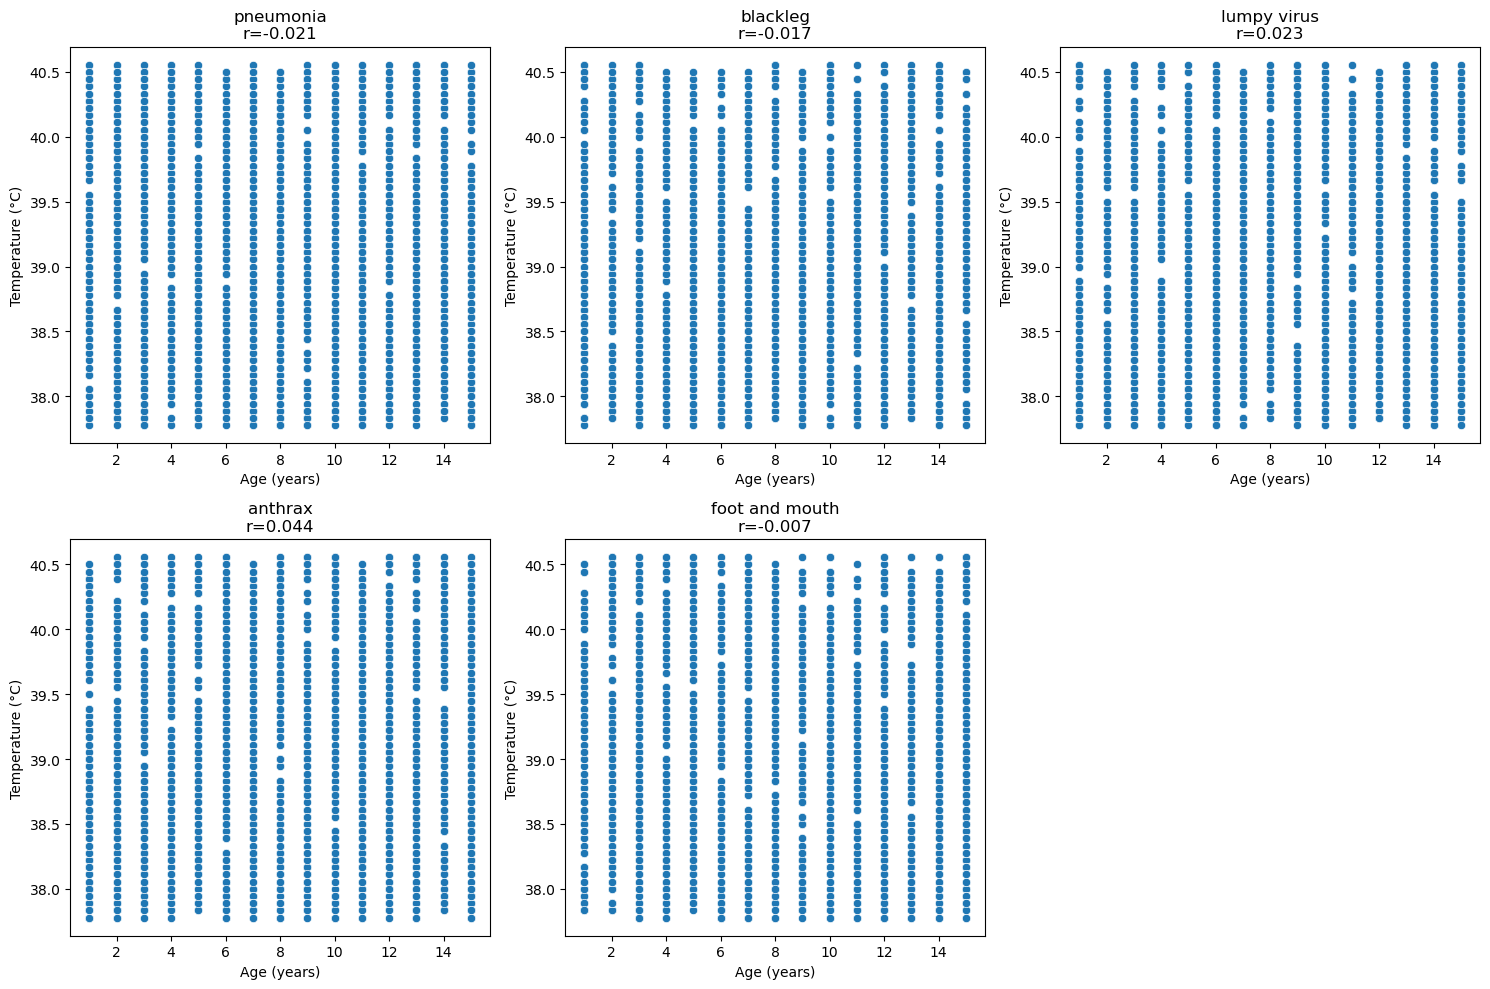

In [16]:
# Calculate correlations for each disease group
correlations = {}
for disease in cows_df['Disease'].unique():
    disease_data = cows_df[cows_df['Disease'] == disease]
    pearson_corr = disease_data['Temperature_Celsius'].corr(disease_data['Age'], method='pearson')
    spearman_corr = disease_data['Temperature_Celsius'].corr(disease_data['Age'], method='spearman')
    correlations[disease] = {'Pearson': pearson_corr, 'Spearman': spearman_corr}

# Display correlation results
print("Temperature-Age Correlations by Disease:")
for disease, corr in correlations.items():
    print(f"\n{disease}:")
    print(f"Pearson correlation: {corr['Pearson']:.3f}")
    print(f"Spearman correlation: {corr['Spearman']:.3f}")

# Visualize correlations with scatter plots
plt.figure(figsize=(15, 10))
for i, disease in enumerate(cows_df['Disease'].unique(), 1):
    plt.subplot(2, 3, i)
    disease_data = cows_df[cows_df['Disease'] == disease]
    sns.scatterplot(data=disease_data, x='Age', y='Temperature_Celsius')
    plt.title(f'{disease}\nr={correlations[disease]["Pearson"]:.3f}')
    plt.xlabel('Age (years)')
    plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()